## Problema 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [2]:
x_training = pd.read_csv('x_entrenamiento.csv', header=None)
Xt = x_training.values
y_training = pd.read_csv('y_entrenamiento.csv', header=None)
Yt = y_training.values
x_validation = pd.read_csv('x_validacion.csv', header=None)
Xv = x_validation.values
y_validation = pd.read_csv('y_validacion.csv', header=None)
Yv = y_validation.values

#### a) Graficación de los datos de entrenamiento y validación

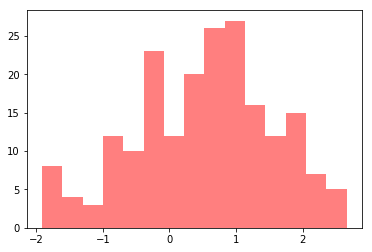

In [3]:
x1t = Xt[:,:1]
x2t = Xt[:,1:]
x1v = Xv[:,:1]
x2v = Xv[:,1:]
n, bins, patches = plt.hist(Yt[:,0], 15, facecolor='red', alpha=0.5)

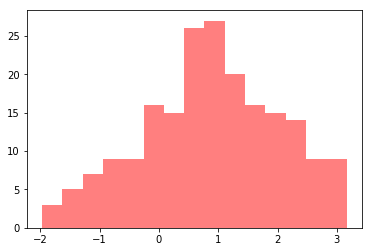

In [4]:
n, bins, patches = plt.hist(Yv[:,0], 15, facecolor='red', alpha=0.5)

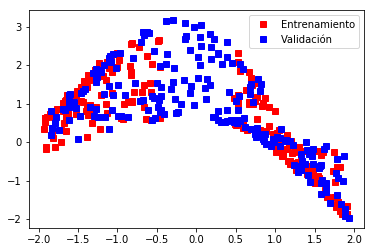

In [5]:
train_plot = plt.plot(x1t, Yt, 'rs', label= 'Entrenamiento')
valid_plot = plt.plot(x1v, Yv, 'bs', label= u'Validación')
plt.legend()
plt.show()

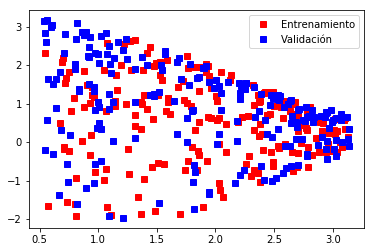

In [6]:
train_plot = plt.plot(x2t, Yt, 'rs', label= 'Entrenamiento')
valid_plot = plt.plot(x2v, Yv, 'bs', label= u'Validación')
plt.legend()
plt.show()

#### b) Regresión lineal

In [7]:
# Design Matrix
ones_train = np.ones(x1t.shape[0])
phi_Xt = np.column_stack((ones_train, Xt))

# MLE / Least Squares
theta = np.dot(np.linalg.inv(np.dot(phi_Xt.T, phi_Xt)),np.dot(phi_Xt.T, Yt))
theta

array([[ 1.08332958],
       [-0.54618495],
       [-0.30062493]])

- $\theta_1 = 1.0833$
- $\theta_2 = -0.5462$
- $\theta_3 = -0.3006$

In [8]:
# Sum of the squared error calculation (SSE) over the training set
Yth = np.dot(phi_Xt, theta)
sse_training = np.square(Yt - Yth).sum()
mse_training = sse_training / Yt.size
mse_training

0.5896497098972882

$MSE_{Training} = 0.5896$

In [9]:
# Behavior of the validation set
ones_valid = np.ones(x1v.shape[0])
phi_Xv = np.column_stack((ones_valid, Xv))
Yvh = np.dot(phi_Xv, theta)
sse_validation = np.square(Yv - Yvh).sum()
mse_validation = sse_validation / Yv.size
mse_validation

0.8987307291283128

$SSE_{Validation} = 0.8987$

#### c) Expansión de base polinomial / Regularización L2

In [10]:
def polynomial_expansion(X, degree):
    phi_X = X
    for i in range(degree - 1):
        powerX = np.power(X, i + 2)
        phi_X = np.column_stack((phi_X, powerX))
    return phi_X

In [11]:
# Performs a linear regression over the training set Xt/Yt using LS with L2
def regularized_lsq(Xt, Yt, lambda_val, degree):
        
    # Design matrix for a polynomial expansion of degree n
    phi_Xt = np.column_stack((np.ones(Xt.shape[0]), polynomial_expansion(Xt, degree)))

    # Create "ridge_matrix"
    XTX = np.dot(phi_Xt.T, phi_Xt)
    Id = np.identity(XTX.shape[0])
    ridge_matrix = lambda_val * Id

    # Regularizerd Least Squares
    theta = np.dot(np.linalg.inv(ridge_matrix + XTX), np.dot(phi_Xt.T, Yt))
    
    return theta

In [12]:
# Given the X test inputs, with their corresponding Y labels, and a vector of parameters theta, calculate
# the MSE
def mse_error(X, Y, theta):
    phi_X = np.column_stack((np.ones(X.shape[0]), X))
    Yh = np.dot(phi_X, theta)
    sse_training = np.square(Y - Yh).sum()
    mse_training = sse_training / Y.size
    return mse_training


In [13]:
# Performs several regularized_lq regressions over the sets, by using a different 
# set of basis functions (resulting from a polynomial expansion)
# Returns the MSE for the training and validations sets, and the resulting theta parameters
def regularized_lsq_errors(Xt, Yt, Xv, Yv, lambda_val, min_degree, max_degree):
    
    mse_training_values = []
    mse_validation_values = []
    
    for i in range(min_degree, max_degree + 1):
        theta = regularized_lsq(Xt, Yt, lambda_val, i)
        
        #Training set
        phi_Xt = polynomial_expansion(Xt, i)
        mse_training = mse_error(phi_Xt, Yt, theta)
        mse_training_values.append(mse_training)
        
        # Validation set
        phi_Xv = polynomial_expansion(Xv, i)
        mse_validation = mse_error(phi_Xv, Yv, theta)
        mse_validation_values.append(mse_validation)
    
    return mse_training_values, mse_validation_values

In [14]:
# Plot a comparison between the Training MSE and the Validation MSE, given the min and max
# degrees, and the lambda parameters
def plot_errors(Xt, Yt, Xv, Yv, lambda_val, min_degree, max_degree):
    mse_t, mse_v = regularized_lsq_errors(Xt, Yt, Xv, Yv, lambda_val, min_degree, max_degree)
    degree = np.arange(min_degree, max_degree + 1)
    train_plot = plt.plot(degree, mse_t, 'rs', label= 'Entrenamiento', linestyle='-')
    valid_plot = plt.plot(degree, mse_v, 'bs', label= u'Validación', linestyle='-')
    plt.legend()
    plt.grid(True)
    plt.xlabel('Degree of the polynomial expansion')
    plt.ylabel('MSE')
    plt.title('MSE for lambda = ' + str(lambda_val))
    plt.show()

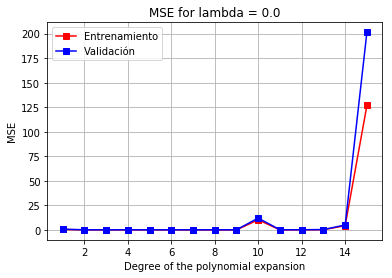

In [15]:
min_degree = 1
max_degree = 15
plot_errors(Xt, Yt, Xv, Yv, 0.0, min_degree, max_degree)

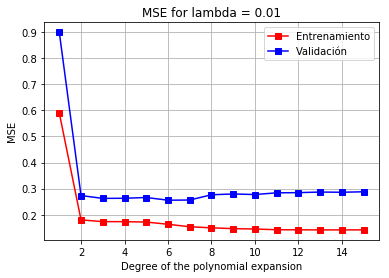

In [16]:
plot_errors(Xt, Yt, Xv, Yv, 0.01, min_degree, max_degree)

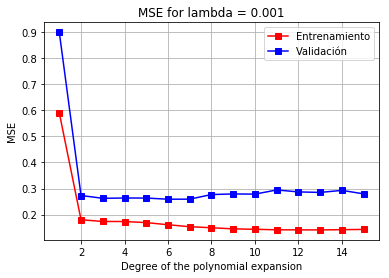

In [17]:
plot_errors(Xt, Yt, Xv, Yv, 0.001, min_degree, max_degree)

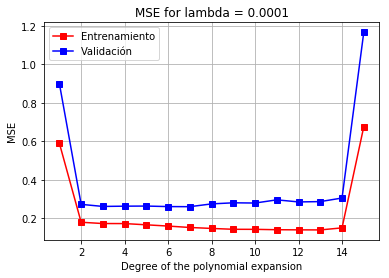

In [18]:
plot_errors(Xt, Yt, Xv, Yv, 0.0001, min_degree, max_degree)

In [19]:
chosen_lambda_value = 0.0001
chosen_degree = 2
theta = regularized_lsq(Xt, Yt, chosen_lambda_value, chosen_degree)
theta

array([[ 2.10067733],
       [-0.61608094],
       [-0.23677395],
       [-0.6165337 ],
       [-0.02981307]])

In [20]:
mse_training = mse_error(polynomial_expansion(Xt, chosen_degree), Yt, theta)
print mse_training
mse_validation = mse_error(polynomial_expansion(Xv, chosen_degree), Yv, theta)
print mse_validation

0.18034245429211979
0.27318148291685457
